### Classification_1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('default_of_credit_card_clients.xls')

In [3]:
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Проверка на выбросы и пропущенные данные

Посмотрим информацию о датасете <br>
Как видно, в нем нет null-значений

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

Удалим столбец Unnamed, так как он повторяет порядковый номер строк в матрице данных

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

Допустимые значения признаков X6-X11: <br>
 - -2 - кредитная карта не использовалась
 - -1 - все расходы по кредитной карте уже полностью оплачены
 - 0 - использование возобновляемого кредита
 - 1 - 9 - отсрочка платежа на заданное количество месяцев

Удалим строки, в которых:<br>
1. Значения категориальных признаков не подходят под установленную шкалу:
 - X2: Gender (1 = male; 2 = female)
 - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 - X4: Marital status (1 = married; 2 = single; 3 = others).
2. Возраст опрашиваемого меньше 18 (так как это минимально возможный возраст для выдачи кредитной карты)
3. Значения признаков X6 - X11: History of past payment не соотвествуют установленному диапазону от -2 до 9 

In [6]:
for index, row in data.iterrows():
    if (row['X2'] not in [1, 2]
        or (row['X3'] not in  [1, 2, 3, 4])
        or (row['X4'] not in  [1, 2, 3])
        or (row['X5'] < 18)
        or (row['X6'] not in [i for i in range(-2, 10)])
        or (row['X7'] not in [i for i in range(-2, 10)])
        or (row['X8'] not in [i for i in range(-2, 10)])
        or (row['X9'] not in [i for i in range(-2, 10)])
        or (row['X10'] not in [i for i in range(-2, 10)])
        or (row['X11'] not in [i for i in range(-2, 10)])): 
        data = data.drop(index)

In [7]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Удалим строки, в которых выплаты X18-X23: Amount of previous payment (NT dollar) отрицательные, так как такие данные не имеют смысла (так как выплаты банку не могут быть отрицательными). <br>
При этом значения X12-X17: Amount of bill statement (NT dollar) мы не проверяем, так как они могут быть отрицательными при задолженности.

In [8]:
rows = [f'X{i}' for i in range(18, 24)]
for index, row in data.iterrows():
    isDrop = False
    for r in rows:
        if row[r] < 0:
            isDrop = True
    if isDrop:
        data = data.drop(index)

In [9]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
X = data.drop(['Y'], axis=1)
y = data['Y']

In [11]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


### Стандартизируем данные

In [12]:
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

Разделим признаки на две части: категориальные и числовые, чтобы стандартизировать только числовые признаки<br>

Категориальные признаки:
 - X2: Gender (1 = male; 2 = female).
 - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 - X4: Marital status (1 = married; 2 = single; 3 = others).
 - X6 - X11: History of past payment. <br>
Числовые признаки - остальные


#### Стандартизация числовых признаков с помощью Standart Scaler'а (приведение к интервалу от -1 до 1):

In [13]:
X_for_stand = X.drop(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11'], axis=1)
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_for_stand)

In [14]:
df_X_scaled_standart = pd.DataFrame(data=X_stand, columns=['X1', 'X5', 'X12',
                                        'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                                        'X21', 'X22', 'X23'])

In [15]:
df_X_scaled_standart.index += 1
df_X_scaled_standart

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,-1.135512,-1.244325,-0.641203,-0.646339,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,-0.293444
2,-0.365937,-1.027242,-0.657981,-0.665755,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,-0.180174
3,-0.596810,-0.158912,-0.296016,-0.492299,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,-0.010269
4,-0.904640,0.166712,-0.054075,-0.009999,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,-0.236809
5,-0.904640,2.337536,-0.577089,-0.610131,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,0.273118,0.265508,-0.269355,-0.254989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.403638,0.383794,1.880775,2.028584,2.337318,0.699139,-0.148250,-0.384390,0.172045,0.610911,-0.011115,-0.113404,0.013446,-0.236809
29598,-0.135065,0.817959,-0.671597,-0.664303,-0.626439,-0.531870,-0.577373,-0.652876,-0.230116,-0.102595,0.216123,-0.299136,-0.314553,-0.293444
29599,-1.058555,0.166712,-0.645946,-0.642758,-0.637203,-0.346514,-0.323791,-0.327651,-0.340993,-0.255309,0.955688,-0.040014,-0.183353,-0.117876
29600,-0.673767,0.600876,-0.716957,0.415054,0.426789,0.150345,-0.467567,0.169451,4.843705,-0.107662,-0.228685,-0.184756,3.159872,-0.191274


#### Стандартизация числовых признаков с помощью MinMax Scaler'а (приведение к интервалу от 0 до 1):

In [16]:
scalerMinMax = MinMaxScaler()
X_stand_min_max = scalerMinMax.fit_transform(X_for_stand)

In [17]:
df_X_scaled_minMax = pd.DataFrame(data=X_stand_min_max, columns=['X1', 'X5', 'X12',
                                        'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                                        'X21', 'X22', 'X23'])
df_X_scaled_minMax.index += 1
df_X_scaled_minMax

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29598,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29599,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29600,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


Выделим категориальные признаки

In [18]:
X_categorical = X[['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']] 
X_categorical.index = range(1, 29602)

In [19]:
X_categorical

,X2,X3,X4,X6,X7,X8,X9,X10,X11
1,2,2,1,2,2,-1,-1,-2,-2
2,2,2,2,-1,2,0,0,0,2
3,2,2,2,0,0,0,0,0,0
4,2,2,1,0,0,0,0,0,0
5,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
29597,1,3,1,0,0,0,0,0,0
29598,1,3,2,-1,-1,-1,-1,0,0
29599,1,2,2,4,3,2,-1,0,0
29600,1,3,1,1,-1,0,0,0,-1


Объединим категориальные и стандартизированные числовые признаки обратно в один датафрейм.

In [20]:
X_scaled_standart =  pd.concat([df_X_scaled_standart, X_categorical], axis=1)
X_scaled_standart

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,X23,X2,X3,X4,X6,X7,X8,X9,X10,X11
1,-1.135512,-1.244325,-0.641203,-0.646339,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,...,-0.293444,2,2,1,2,2,-1,-1,-2,-2
2,-0.365937,-1.027242,-0.657981,-0.665755,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,...,-0.180174,2,2,2,-1,2,0,0,0,2
3,-0.596810,-0.158912,-0.296016,-0.492299,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,...,-0.010269,2,2,2,0,0,0,0,0,0
4,-0.904640,0.166712,-0.054075,-0.009999,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,...,-0.236809,2,2,1,0,0,0,0,0,0
5,-0.904640,2.337536,-0.577089,-0.610131,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,...,-0.254989,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.403638,0.383794,1.880775,2.028584,2.337318,0.699139,-0.148250,-0.384390,0.172045,0.610911,...,-0.236809,1,3,1,0,0,0,0,0,0
29598,-0.135065,0.817959,-0.671597,-0.664303,-0.626439,-0.531870,-0.577373,-0.652876,-0.230116,-0.102595,...,-0.293444,1,3,2,-1,-1,-1,-1,0,0
29599,-1.058555,0.166712,-0.645946,-0.642758,-0.637203,-0.346514,-0.323791,-0.327651,-0.340993,-0.255309,...,-0.117876,1,2,2,4,3,2,-1,0,0
29600,-0.673767,0.600876,-0.716957,0.415054,0.426789,0.150345,-0.467567,0.169451,4.843705,-0.107662,...,-0.191274,1,3,1,1,-1,0,0,0,-1


In [21]:
X_scaled_minMax =  pd.concat([df_X_scaled_minMax, X_categorical], axis=1)
X_scaled_minMax

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,X23,X2,X3,X4,X6,X7,X8,X9,X10,X11
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.000000,2,2,1,2,2,-1,-1,-2,-2
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.003783,2,2,2,-1,2,0,0,0,2
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.009458,2,2,2,0,0,0,0,0,0
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.001892,2,2,1,0,0,0,0,0,0
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.001284,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0.001892,1,3,1,0,0,0,0,0,0
29598,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0.000000,1,3,2,-1,-1,-1,-1,0,0
29599,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0.005864,1,2,2,4,3,2,-1,0,0
29600,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,0.003412,1,3,1,1,-1,0,0,0,-1


### Категориальные признаки

Разобьем категориальные признаки X2(Gender), X3(Education), X4(Marital status) на бинарные стобцы. 

Категориальные признаки X6-X11 не изменяем, так как во-первых, в них есть числовая зависимость отметки категории от количествва месяцев, на которое была отложена выплата. А, во-вторых, добавление 72 столбцов(т.к. в каждом признаке по 12 категорий), значительно затруднит обучение моделей.

In [22]:
X_scaled_standart = pd.get_dummies(X_scaled_standart, columns=['X2']).rename(columns={'X2_1':'Male',
                                                        'X2_2':'Female'})
X_scaled_standart = pd.get_dummies(X_scaled_standart, columns=['X3']).rename(columns={'X3_1':'graduate school',
                                                        'X3_2':'university',
                                                        'X3_3':'high school',
                                                        'X3_4':'others'})
X_scaled_standart = pd.get_dummies(X_scaled_standart, columns=['X4']).rename(columns={'X4_1':'married',
                                                        'X4_2':'single',
                                                        'X4_3':'others'})
X_scaled_standart

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,X11,Male,Female,graduate school,university,high school,others,married,single,others
1,-1.135512,-1.244325,-0.641203,-0.646339,-0.667135,-0.671740,-0.662877,-0.652876,-0.340993,-0.225468,...,-2,0,1,0,1,0,0,1,0,0
2,-0.365937,-1.027242,-0.657981,-0.665755,-0.638302,-0.620771,-0.605957,-0.598087,-0.340993,-0.211998,...,2,0,1,0,1,0,0,0,1,0
3,-0.596810,-0.158912,-0.296016,-0.492299,-0.480945,-0.448499,-0.416610,-0.391631,-0.249370,-0.190343,...,0,0,1,0,1,0,0,0,1,0
4,-0.904640,0.166712,-0.054075,-0.009999,0.035991,-0.230680,-0.185780,-0.156445,-0.220278,-0.167864,...,0,0,1,0,1,0,0,1,0,0
5,-0.904640,2.337536,-0.577089,-0.610131,-0.158677,-0.345548,-0.347449,-0.331449,-0.220278,1.333383,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.403638,0.383794,1.880775,2.028584,2.337318,0.699139,-0.148250,-0.384390,0.172045,0.610911,...,0,1,0,0,0,1,0,1,0,0
29598,-0.135065,0.817959,-0.671597,-0.664303,-0.626439,-0.531870,-0.577373,-0.652876,-0.230116,-0.102595,...,0,1,0,0,0,1,0,0,1,0
29599,-1.058555,0.166712,-0.645946,-0.642758,-0.637203,-0.346514,-0.323791,-0.327651,-0.340993,-0.255309,...,0,1,0,0,1,0,0,0,1,0
29600,-0.673767,0.600876,-0.716957,0.415054,0.426789,0.150345,-0.467567,0.169451,4.843705,-0.107662,...,-1,1,0,0,0,1,0,1,0,0


In [23]:
X_scaled_minMax = pd.get_dummies(X_scaled_minMax, columns=['X2']).rename(columns={'X2_1':'Male',
                                                        'X2_2':'Female'})
X_scaled_minMax = pd.get_dummies(X_scaled_minMax, columns=['X3']).rename(columns={'X3_1':'graduate school',
                                                        'X3_2':'university',
                                                        'X3_3':'high school',
                                                        'X3_4':'others'})
X_scaled_minMax = pd.get_dummies(X_scaled_minMax, columns=['X4']).rename(columns={'X4_1':'married',
                                                        'X4_2':'single',
                                                        'X4_3':'others'})
X_scaled_minMax

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,...,X11,Male,Female,graduate school,university,high school,others,married,single,others
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,-2,0,1,0,1,0,0,1,0,0
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,2,0,1,0,1,0,0,0,1,0
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0,0,1,0,1,0,0,0,1,0
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0,0,1,0,1,0,0,1,0,0
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29597,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0,1,0,0,0,1,0,1,0,0
29598,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0,1,0,0,0,1,0,0,1,0
29599,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0,1,0,0,1,0,0,0,1,0
29600,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,-1,1,0,0,0,1,0,1,0,0


То же сделаем и для нестандартизированных данных

In [24]:
X_not_scaled = X
X_not_scaled = pd.get_dummies(X_not_scaled, columns=['X2']).rename(columns={'X2_1':'Male',
                                                        'X2_2':'Female'})
X_not_scaled = pd.get_dummies(X_not_scaled, columns=['X3']).rename(columns={'X3_1':'graduate school',
                                                        'X3_2':'university',
                                                        'X3_3':'high school',
                                                        'X3_4':'others'})
X_not_scaled = pd.get_dummies(X_not_scaled, columns=['X4']).rename(columns={'X4_1':'married',
                                                        'X4_2':'single',
                                                        'X4_3':'others'})
X_not_scaled

,X1,X5,X6,X7,X8,X9,X10,X11,X12,X13,...,X23,Male,Female,graduate school,university,high school,others,married,single,others
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,1,0,1,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,1,0,1,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,1,0,1,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,1000,1,0,0,0,1,0,1,0,0
29997,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,1,0,0,1,0
29998,30000,37,4,3,2,-1,0,0,3565,3356,...,3100,1,0,0,1,0,0,0,1,0
29999,80000,41,1,-1,0,0,0,-1,-1645,78379,...,1804,1,0,0,0,1,0,1,0,0


In [25]:
y.index = range(1, 29602)

### Описание данных на основе статистик

In [26]:
import matplotlib.pyplot as plt

#### Сравним среднее и медианное значения Amount of bill statement

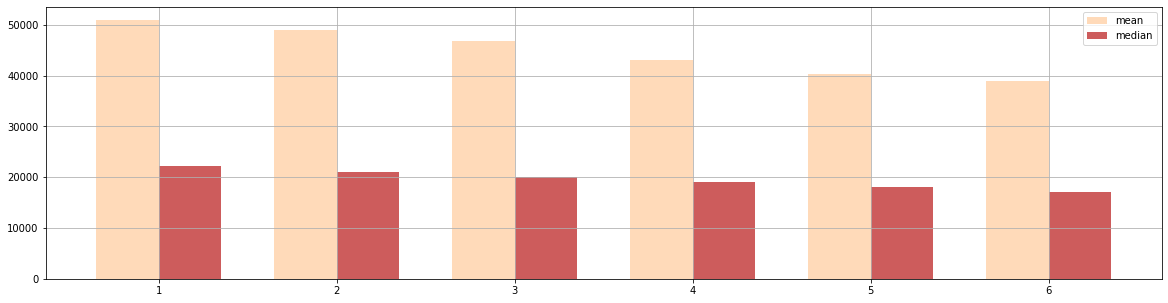

In [27]:
x = np.arange(1, 7)
width = 0.35 

fig, ax = plt.subplots(figsize=(20,5))

rects1 = ax.bar(x - width/2, X.mean()[11:17], width, label='mean', color='peachpuff')
rects2 = ax.bar(x + width/2, X.median()[11:17], width, label='median', color='indianred')

ax.set_xticks(x)
ax.grid()
ax.legend()
plt.show()

#### Сравним среднее и медианное значения Amount of previous payment

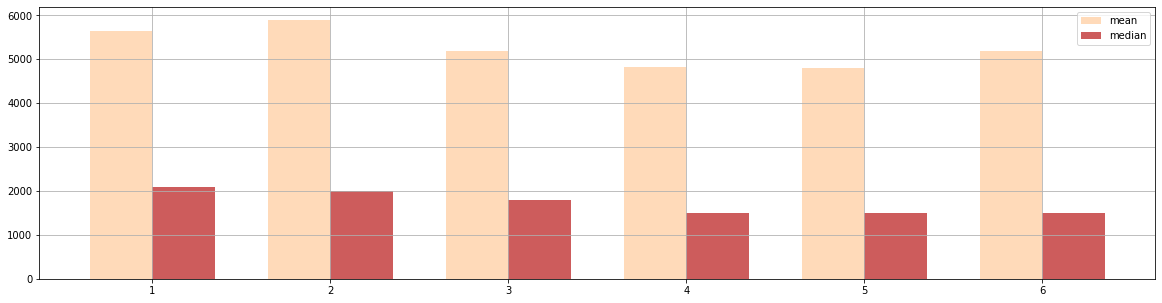

In [28]:
x = np.arange(1, 7)
width = 0.35 

fig, ax = plt.subplots(figsize=(20,5))

rects1 = ax.bar(x - width/2, X.mean()[17:23], width, label='mean', color='peachpuff')
rects2 = ax.bar(x + width/2, X.median()[17:23], width, label='median', color='indianred')

ax.set_xticks(x)
ax.grid()
ax.legend()
plt.show()

Видно, что медианное и среднее значения сильно отличаются, и в обоих группах признаков медианна ниже среднего

#### Посмотрим процентное соотношение количества людей, разделенных по категориальным признакам

In [29]:
dict_gender={'cnt':[0]*x for x in range(3)}
dict_education={'cnt':[0]*x for x in range(5)}
dict_marital={'cnt':[0]*x for x in range(4)}
for index, row in data.iterrows():
    dict_gender['cnt'][row['X2']-1] += 1    
    dict_education['cnt'][row['X3']-1] += 1
    dict_marital['cnt'][row['X4']-1] += 1

In [174]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
colors1 = ['lightskyblue','lightcoral']
colors2 = ['lightpink', 'lightgray', 'paleturquoise', 'y']
colors3 = ['sandybrown', 'lightsteelblue', 'indigo']

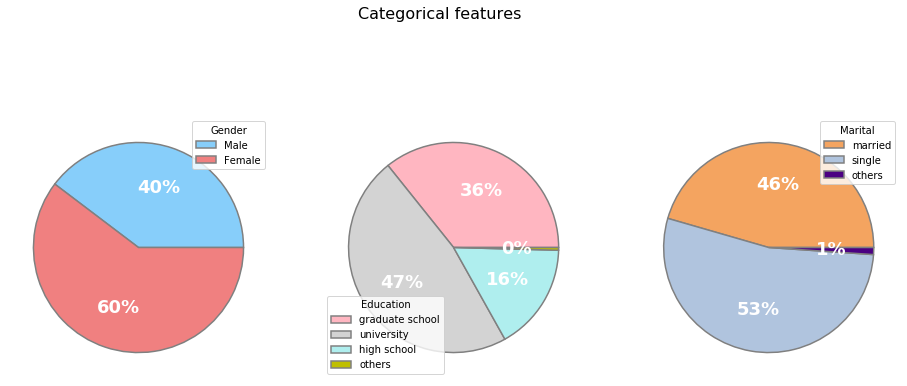

In [175]:
fig, ax = plt.subplots(figsize=(16, 7), ncols=3)
fig.suptitle('Categorical features', fontsize = 16)

pie_1 = ax[0].pie( x=dict_gender['cnt'], autopct='%.0f%%', colors=colors1,
                  wedgeprops={ 'linewidth' : 1.5, 'edgecolor' : "grey" },  textprops=dict(color="w"))
ax[0].legend(pie_1[0],
             ["Male","Female"],
             title="Gender", 
             loc="best")

plt.setp(pie_1[2], size=18, weight="bold")
pie_2 = ax[1].pie(x=dict_education['cnt'], autopct='%.0f%%', colors=colors2,
                  wedgeprops={ 'linewidth' : 1.5, 'edgecolor' : "grey" },  textprops=dict(color="w"))
ax[1].legend(pie_2[0],
             ['graduate school','university','high school', 'others'],
             title="Education",
             loc="best")
plt.setp(pie_2[2], size=18, weight="bold")
pie_3 = ax[2].pie(x=dict_marital['cnt'], autopct='%.0f%%', colors=colors3,
                  wedgeprops={ 'linewidth' : 1.5, 'edgecolor' : "grey" },  textprops=dict(color="w"))
ax[2].legend(pie_3[0],
             ['married','single','others'],
             title="Marital",
             loc="best")
plt.setp(pie_3[2], size=18, weight="bold")
             
plt.show()

In [32]:
dict_age={'cnt':[0]*x for x in range(4)}
for index, row in data.iterrows():
    if (row['X5'] <= 35):
        dict_age['cnt'][0] += 1 
    elif (row['X5'] <= 65):
        dict_age['cnt'][1] += 1 
    else:
        dict_age['cnt'][2] += 1 

In [176]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=['from 18 to 35','from 36 to 65','more than 65'],
                     values=dict_age['cnt'], name='Education'))
fig.update_traces(hoverinfo='label+percent', textfont_size=20, textfont=dict(color='#ffffff'),
                  marker=dict(colors=['sandybrown','chocolate', 'maroon', ], line=dict(color='#000000', width=0.5)))
fig.show()

#### Посмотрим максимальное, среднее, медианное и минимальное значения Amount of the given credit (it includes both the individual consumer credit and his/her family (supplementary) credit).

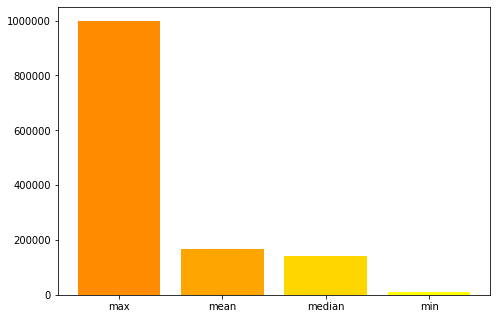

In [161]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metr = ['max', 'mean', 'median', 'min']
vals = [X['X1'].max(), X['X1'].mean(), X['X1'].median(), X['X1'].min()]
ax.bar(metr, vals, color=['darkorange', 'orange', 'gold', 'yellow'])
plt.show()

#### Посмотрим матрицу корреляции для некатегориальных признаков

In [34]:
Xf = pd.DataFrame(X.drop(['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 
                             'X9', 'X10', 'X11'], axis=1)).astype(float)

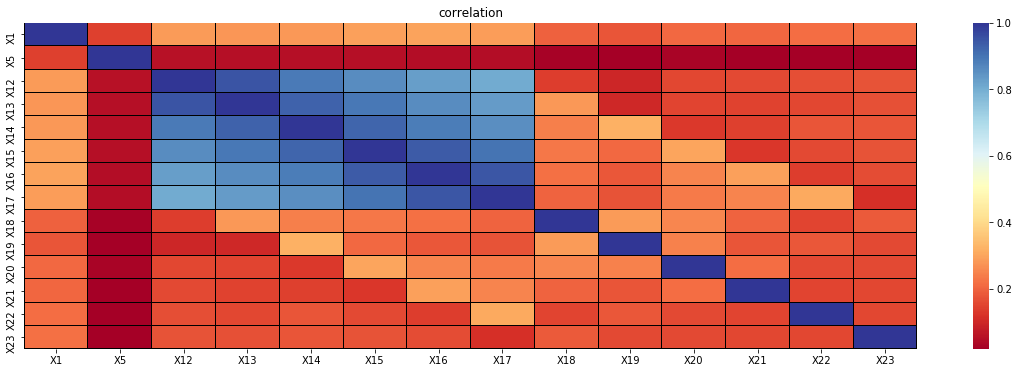

In [177]:
import seaborn as sns
plt.figure(figsize=(20, 6))
ax = sns.heatmap(data=Xf.corr(), cmap = 'RdYlBu', linewidths=0.009, linecolor='k').set_title(f'correlation')

Как видно, наименее коррелируемый с другими признак - возраст(что вполне логично)<br>
Наиболее коррелируемая группа признаков - Х12-Х17(Amount of bill statement), что также логично, так как эти признаки объединены по смыслу изначально


### Анализ главных компонент

#### Проведем анализ главных компонент для данных, стандартизированных с помощью Standrat Scaler

In [36]:
from sklearn.decomposition import PCA

In [163]:
pca = PCA()
X_pca_scaled_standart = pca.fit_transform(X_scaled_standart)

In [164]:
print(np.round(pca.explained_variance_ratio_, 2))

[0.31 0.2  0.07 0.05 0.04 0.04 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


Видим, что первые 14 признаков дают около 31 + 20 + 7 + 5 + 4 + 4 + 4 + 4 + 3 + 3 + 3 + 2 + 2 + 2 = 96% информации. Посмотрим, какие столбцы с какими коэффициентами входят в эти компоненты

In [169]:
number_of_components = 14

components = np.round(pca.components_, 2)

for i in range(number_of_components):
    largest = [abs(components[i][x]) for x in range(0, 5)] 
    for j in range(len(components[i])):
        if abs(components[i][j]) > min(largest) and abs(components[i][j]) not in largest:
            largest.remove(min(largest))
            largest.append(abs(components[i][j]))
            
    largest = list(filter(lambda a: a > 0.0, largest))
    largest = sorted(largest, reverse=True)
    
    print('Explained variance ratio: ',np.round(pca.explained_variance_ratio_, 2)[i])

    for l in largest:
        for j in range(len(components[i])):
            if abs(components[i][j]) == l:
                print(f'{abs(components[i][j])} \t {X_scaled_standart.columns[[j]].tolist()[0]}')
    print()


Explained variance ratio:  0.31
0.31 	 X8
0.31 	 X9
0.3 	 X7
0.3 	 X10
0.3 	 X11
0.28 	 X13
0.28 	 X14
0.28 	 X15
0.28 	 X16
0.28 	 X17
0.28 	 X13
0.28 	 X14
0.28 	 X15
0.28 	 X16
0.28 	 X17
0.27 	 X12

Explained variance ratio:  0.2
0.29 	 X1
0.28 	 X7
0.28 	 X8
0.27 	 X9
0.26 	 X14
0.26 	 X15
0.25 	 X12
0.25 	 X13
0.25 	 X16
0.25 	 X17
0.25 	 X10

Explained variance ratio:  0.07
0.43 	 X19
0.4 	 X18
0.39 	 X20
0.33 	 X21
0.3 	 X23

Explained variance ratio:  0.05
0.88 	 X5
0.3 	 married
0.3 	 single
0.14 	 X1
0.09 	 high school
0.07 	 graduate school

Explained variance ratio:  0.04
0.56 	 X22
0.4 	 X23
0.36 	 X6
0.32 	 X7
0.29 	 X11

Explained variance ratio:  0.04
0.7 	 X21
0.47 	 X23
0.27 	 X19
0.26 	 X18
0.26 	 X20
0.14 	 X14
0.14 	 X17

Explained variance ratio:  0.04
0.6 	 X23
0.46 	 X19
0.29 	 X6
0.24 	 X11
0.23 	 X22

Explained variance ratio:  0.04
0.67 	 X22
0.34 	 X6
0.25 	 X18
0.24 	 X21
0.24 	 X10
0.23 	 X23
0.23 	 X7

Explained variance ratio:  0.03
0.79 	 X20
0.45 	 X2

В основном, видно, что в полученных компонентах признаки объединены по принципу: они либо все связаны с выплатами, либо нет.

Выберем полученные новые признаки, дающие достаточное количество информации, уменьшив размерность

In [40]:
X_pca_scaled_standart = X_pca_scaled_standart[:, :14]

#### Проведем анализ главных компонент для данных, стандартизированных с помощью MinMax Scaler

In [170]:
pca = PCA()
X_pca_scaled_minMax = pca.fit_transform(X_scaled_minMax)

In [171]:
print(np.round(pca.explained_variance_ratio_, 2))

[0.6  0.09 0.06 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


Как видно, при данных, стандартизованных с помощью MinMax, первые 7 компонент дают 60 + 9 + 6 + 5 + 5 + 4 + 4 = 93% информации

In [172]:
number_of_components = 7

components = np.round(pca.components_, 2)

for i in range(number_of_components):
    largest = [abs(components[i][x]) for x in range(0, 5)] 
    for j in range(len(components[i])):
        if abs(components[i][j]) > min(largest) and abs(components[i][j]) not in largest:
            largest.remove(min(largest))
            largest.append(abs(components[i][j]))
            
    largest = list(filter(lambda a: a > 0.0, largest))
    largest = sorted(largest, reverse=True)
    
    print('Explained variance ratio: ',np.round(pca.explained_variance_ratio_, 2)[i])

    for l in largest:
        for j in range(len(components[i])):
            if abs(components[i][j]) == l:
                print(f'{abs(components[i][j])} \t {X_scaled_minMax.columns[[j]].tolist()[0]}')
    print()


Explained variance ratio:  0.6
0.44 	 X8
0.43 	 X9
0.42 	 X7
0.41 	 X10
0.39 	 X11

Explained variance ratio:  0.09
0.61 	 X6
0.45 	 X11
0.44 	 X7
0.4 	 X10
0.23 	 X9

Explained variance ratio:  0.06
0.63 	 X6
0.57 	 X8
0.37 	 X11
0.26 	 X7
0.18 	 X9
0.18 	 X10

Explained variance ratio:  0.05
0.6 	 married
0.6 	 single
0.31 	 graduate school
0.24 	 university
0.23 	 Male
0.23 	 Female
0.08 	 X5

Explained variance ratio:  0.05
0.66 	 Male
0.66 	 Female
0.24 	 married
0.24 	 single
0.06 	 X5
0.06 	 X8
0.05 	 high school
0.04 	 X7

Explained variance ratio:  0.04
0.7 	 university
0.55 	 graduate school
0.24 	 married
0.23 	 single
0.15 	 high school

Explained variance ratio:  0.04
0.57 	 X7
0.56 	 X9
0.46 	 X11
0.29 	 X6
0.16 	 university



In [44]:
X_pca_scaled_minMax = X_pca_scaled_minMax[:, :7]

### KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score

In [46]:
y = y.astype('int')

In [47]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

#### Построим KNN классификатор на данных стандартизированных с помощью Standart Scaler'а

In [182]:
X_pca_scaled_standart_train, X_pca_scaled_standart_test, y_pca_scaled_standart_train, y_pca_scaled_standart_test = train_test_split(X_pca_scaled_standart, y, train_size=0.8)

In [183]:
param_grid = {'n_neighbors': [i for i in range(3, 201, 2)],
             'weights': ['distance'],
             'metric': ['euclidian', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']}
knn = KNeighborsClassifier()

grid_knn_standart = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
grid_knn_standart.fit(X_pca_scaled_standart_train, y_pca_scaled_standart_train)

print (grid_knn_standart.best_score_)
print (grid_knn_standart.best_params_)
print (grid_knn_standart.best_estimator_)

0.7623292248749217
{'metric': 'manhattan', 'n_neighbors': 173, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=173, weights='distance')


In [184]:
y_knn_pca_scaled_standart_pred = grid_knn_standart.best_estimator_.predict(X_pca_scaled_standart_test)
y_knn_pca_scaled_standart_prob = grid_knn_standart.best_estimator_.predict_proba(X_pca_scaled_standart_test)

In [185]:
print("Accuracy: ", accuracy_score(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
print("Recall: ", recall_score(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
print("Precision: ", precision_score(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
print("F1: ", f1_score(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
print(classification_report(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred)) 

Accuracy:  0.815571693970613
Recall:  0.319665907365224
Precision:  0.6823338735818476
F1:  0.43536711478800416
ROC AUC:  0.7706783477706158
Confusion matrix:
 [[4408  196]
 [ 896  421]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4604
           1       0.68      0.32      0.44      1317

    accuracy                           0.82      5921
   macro avg       0.76      0.64      0.66      5921
weighted avg       0.80      0.82      0.79      5921



#### График правильно и неправильно предсказанных точек (с областью, построенной только по двум первым компонентам PCA)

In [186]:
pairs = list(zip(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))

y_pred_wrong = []
X_wrong_0 = []
X_wrong_1 = []

y_pred_true = []
X_true_0 = []
X_true_1 = []

for i in range(len(y_pca_scaled_standart_test)):
    if pairs[i][0] != pairs[i][1]:
        y_pred_wrong.append(pairs[i][1])
        X_wrong_0.append(X_pca_scaled_standart_test[i, 0]) 
        X_wrong_1.append(X_pca_scaled_standart_test[i, 1])
    else:
        y_pred_true.append(pairs[i][1])
        X_true_0.append(X_pca_scaled_standart_test[i, 0]) 
        X_true_1.append(X_pca_scaled_standart_test[i, 1])    

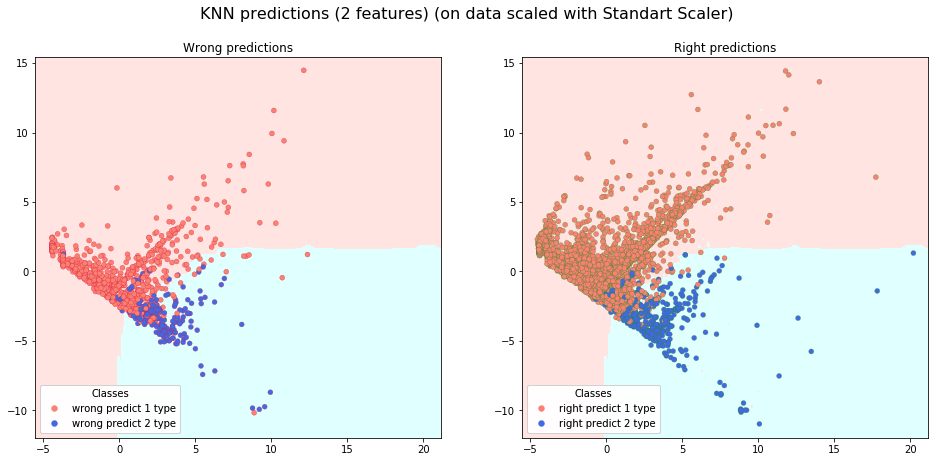

In [187]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
clf_for_plot = neighbors.KNeighborsClassifier(**grid_knn_standart.best_params_)
clf_for_plot.fit(X_pca_scaled_standart_test[:,:2], y_pca_scaled_standart_test)

cmap_light = ListedColormap(['mistyrose', 'lightcyan'])
cmap_bold = ListedColormap(['salmon', 'royalblue'])

F_labels ={'wrong predict 1 type':0, 'wrong predict 2 type':1}
T_labels ={'right predict 1 type':0, 'right predict 2 type':1}
h = 0.1

x_min, x_max = X_pca_scaled_standart_test[:, 0].min() - 1, X_pca_scaled_standart_test[:, 0].max() + 1
y_min, y_max = X_pca_scaled_standart_test[:, 1].min() - 1, X_pca_scaled_standart_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(16, 7), ncols=2)
fig.suptitle('KNN predictions (2 features) (on data scaled with Standart Scaler)', fontsize = 16)
# Plot wrong points
ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[0].set_title('Wrong predictions')

# ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)

F_scatter = ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='crimson', s=25)
F_legend = ax[0].legend(handles = F_scatter.legend_elements()[0], labels=F_labels.keys(), loc="lower left", title="Classes")
ax[0].add_artist(F_legend)
# Plot true points
ax[1].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[1].set_title('Right predictions')
# ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)
T_scatter = ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='forestgreen', s=25)
T_legend = ax[1].legend(handles = T_scatter.legend_elements()[0], labels=T_labels.keys(), loc="lower left", title="Classes")
ax[1].add_artist(T_legend)
fig.show()

#### Построим KNN классификатор на данных стандартизированных с помощью MinMax Scaler'а

In [188]:
X_pca_scaled_minMax_train, X_pca_scaled_minMax_test, y_pca_scaled_minMax_train, y_pca_scaled_minMax_test = train_test_split(X_pca_scaled_minMax, y, train_size=0.8)

In [189]:
param_grid = {'n_neighbors': [i for i in range(3, 101, 2)],
             'weights': ['distance'],
             'metric': ['euclidian', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']}
knn = KNeighborsClassifier()

grid_knn_minMax = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
grid_knn_minMax.fit(X_pca_scaled_minMax_train, y_pca_scaled_minMax_train)

print (grid_knn_minMax.best_score_)
print (grid_knn_minMax.best_params_)
print (grid_knn_minMax.best_estimator_)

0.7536765908920142
{'metric': 'minkowski', 'n_neighbors': 99, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=99, weights='distance')


In [190]:
y_knn_pca_scaled_minMax_pred = grid_knn_minMax.best_estimator_.predict(X_pca_scaled_minMax_test)
y_knn_pca_scaled_minMax_prob = grid_knn_minMax.best_estimator_.predict_proba(X_pca_scaled_minMax_test)

In [191]:
print("Accuracy: ", accuracy_score(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))
print("Recall: ", recall_score(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))
print("Precision: ", precision_score(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))
print("F1: ", f1_score(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))
print(classification_report(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred)) 

Accuracy:  0.8061138321229522
Recall:  0.33960843373493976
Precision:  0.6246537396121884
F1:  0.44
ROC AUC:  0.7450350061250883
Confusion matrix:
 [[4322  271]
 [ 877  451]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4593
           1       0.62      0.34      0.44      1328

    accuracy                           0.81      5921
   macro avg       0.73      0.64      0.66      5921
weighted avg       0.78      0.81      0.78      5921



#### График правильно и неправильно предсказанных точек (с областью, построенной только по двум первым компонентам PCA)

In [192]:
pairs = list(zip(y_pca_scaled_minMax_test, y_knn_pca_scaled_minMax_pred))

y_pred_wrong = []
X_wrong_0 = []
X_wrong_1 = []

y_pred_true = []
X_true_0 = []
X_true_1 = []

for i in range(len(y_pca_scaled_minMax_test)):
    if pairs[i][0] != pairs[i][1]:
        y_pred_wrong.append(pairs[i][1])
        X_wrong_0.append(X_pca_scaled_minMax_test[i, 0]) 
        X_wrong_1.append(X_pca_scaled_minMax_test[i, 1])
    else:
        y_pred_true.append(pairs[i][1])
        X_true_0.append(X_pca_scaled_minMax_test[i, 0]) 
        X_true_1.append(X_pca_scaled_minMax_test[i, 1])    

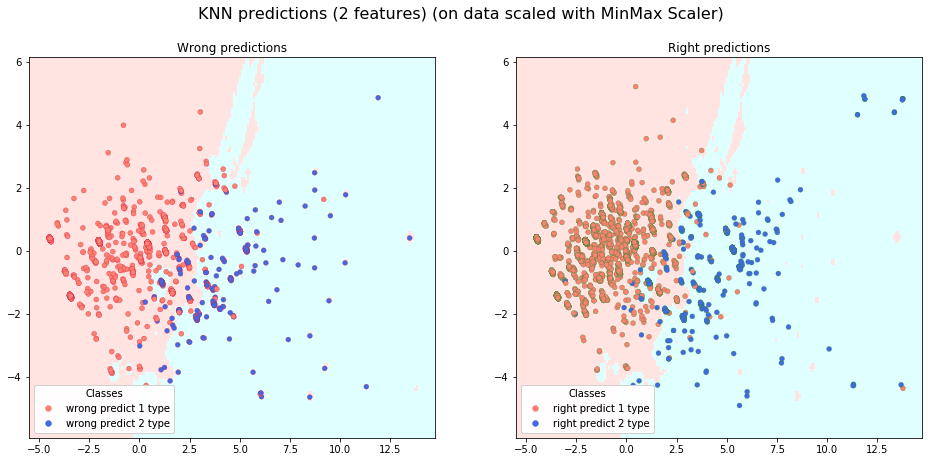

In [193]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
clf_for_plot = neighbors.KNeighborsClassifier(**grid_knn_minMax.best_params_)
clf_for_plot.fit(X_pca_scaled_minMax_test[:,:2], y_pca_scaled_minMax_test)

cmap_light = ListedColormap(['mistyrose', 'lightcyan'])
cmap_bold = ListedColormap(['salmon', 'royalblue'])

F_labels ={'wrong predict 1 type':0, 'wrong predict 2 type':1}
T_labels ={'right predict 1 type':0, 'right predict 2 type':1}
h = 0.1

x_min, x_max = X_pca_scaled_minMax_test[:, 0].min() - 1, X_pca_scaled_minMax_test[:, 0].max() + 1
y_min, y_max = X_pca_scaled_minMax_test[:, 1].min() - 1, X_pca_scaled_minMax_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(16, 7), ncols=2)
fig.suptitle('KNN predictions (2 features) (on data scaled with MinMax Scaler)', fontsize = 16)
# Plot wrong points
ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[0].set_title('Wrong predictions')

# ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)

F_scatter = ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='crimson', s=25)
F_legend = ax[0].legend(handles = F_scatter.legend_elements()[0], labels=F_labels.keys(), loc="lower left", title="Classes")
ax[0].add_artist(F_legend)
# Plot true points
ax[1].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[1].set_title('Right predictions')
# ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)
T_scatter = ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='forestgreen', s=25)
T_legend = ax[1].legend(handles = T_scatter.legend_elements()[0], labels=T_labels.keys(), loc="lower left", title="Classes")
ax[1].add_artist(T_legend)
fig.show()

#### Также построим KNN классификатор на нестандартизированных данных

In [194]:
X_not_scaled_train, X_not_scaled_test, y_not_scaled_train, y_not_scaled_test = train_test_split(X_not_scaled, y, train_size=0.8)

In [195]:
param_grid = {'n_neighbors': [i for i in range(3, 101, 2)], 
             'weights': ['distance'],
             'metric': ['euclidian', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']}
knn = KNeighborsClassifier()

grid_knn_not_scaled = GridSearchCV(knn, param_grid, cv = 5, scoring = 'roc_auc')
grid_knn_not_scaled.fit(X_not_scaled_train, y_not_scaled_train)

print (grid_knn_not_scaled.best_score_)
print (grid_knn_not_scaled.best_params_)
print (grid_knn_not_scaled.best_estimator_)

0.6681457366668473
{'metric': 'manhattan', 'n_neighbors': 85, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=85, weights='distance')


In [196]:
y_knn_not_scaled_pred = grid_knn_not_scaled.best_estimator_.predict(X_not_scaled_test)
y_knn_not_scaled_prob = grid_knn_not_scaled.best_estimator_.predict_proba(X_not_scaled_test)

In [197]:
print("Accuracy: ", accuracy_score(y_not_scaled_test, y_knn_not_scaled_pred))
print("Recall: ", recall_score(y_not_scaled_test, y_knn_not_scaled_pred))
print("Precision: ", precision_score(y_not_scaled_test, y_knn_not_scaled_pred))
print("F1: ", f1_score(y_not_scaled_test, y_knn_not_scaled_pred))
print("ROC AUC: ", roc_auc_score(y_not_scaled_test, y_knn_not_scaled_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_not_scaled_test, y_knn_not_scaled_pred))
print(classification_report(y_not_scaled_test, y_knn_not_scaled_pred)) 

Accuracy:  0.7806113832122952
Recall:  0.06139677666922486
Precision:  0.5128205128205128
F1:  0.10966415352981494
ROC AUC:  0.6571452692540485
Confusion matrix:
 [[4542   76]
 [1223   80]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4618
           1       0.51      0.06      0.11      1303

    accuracy                           0.78      5921
   macro avg       0.65      0.52      0.49      5921
weighted avg       0.73      0.78      0.71      5921



Как видно по различным метрикам, knn, построенные на данных, стандартизированных с помощью Standart Scaler и MinMax Scaler, дают примерно одинкавые результаты(даже количесвто соседей в обоеих моделях одинаковое), и незначительное различие в метриках обусловлено в основном разным разбиентием выборок. В то же время, knn, постренный на нестандартизованных данных дает более плохие результаты.

<img src="https://drive.google.com/uc?export=view&id=13QdeAmoIxT3TXz8tI7kVAYyndzq8Se46" width="300">

### Проанализируем несколько неправильно предсказанных примеров

Посмотрим соседей для нескольких неправильно предсказанных точек и проанализируем почему так произошло

In [198]:
pairs = list(zip(y_pca_scaled_standart_test, y_knn_pca_scaled_standart_pred))
X_wrong_all = []
y_wrong_all = []
y_true = []
for i in range(len(y_pca_scaled_standart_test)):
    if pairs[i][0] != pairs[i][1]:
        y_wrong_all.append(pairs[i][1])
        y_true.append(pairs[i][0])
        X_wrong_all.append(X_pca_scaled_standart_test[i])    

In [200]:
wrongs = []
for i in range(0, 5):
    wrong = []
    for i in X_wrong_all[i]:
        wrong.append(i)
    l = grid_knn_standart.best_estimator_.kneighbors([wrong])
    wrongs.append(l)

In [201]:
for i in range(0, 5):
    print(f'POINT {i+1}')
    print(f'Predicted, but wrong: {y_wrong_all[0]}')
    print(f'Target must be: {y_true[0]}') 
    print(f'Number of 0: {list(y[wrongs[i][1][0]]).count(0)}, Number of 1: {list(y[wrongs[i][1][0]]).count(1)}')
    print('5 nearest neighbors eighbors:')
#     for j in range(len(wrongs[i][0][0])):
    for j in range(5):
#         print(X_pca_scaled_standart[l[1][0][j]])
        print(f'Distance of neighbor: {wrongs[i][0][0][j]} \t\t Value of neighbor: {y[wrongs[i][1][0][j]]}')
    print()

POINT 1
Predicted, but wrong: 1
Target must be: 0
Number of 0: 139, Number of 1: 34
5 nearest neighbors eighbors:
Distance of neighbor: 3.4632526945048165 		 Value of neighbor: 0
Distance of neighbor: 3.992832458576876 		 Value of neighbor: 0
Distance of neighbor: 4.256047304725339 		 Value of neighbor: 0
Distance of neighbor: 4.301506001551606 		 Value of neighbor: 0
Distance of neighbor: 4.56097523984714 		 Value of neighbor: 1

POINT 2
Predicted, but wrong: 1
Target must be: 0
Number of 0: 126, Number of 1: 47
5 nearest neighbors eighbors:
Distance of neighbor: 3.04319243034197 		 Value of neighbor: 0
Distance of neighbor: 4.201432397879656 		 Value of neighbor: 0
Distance of neighbor: 4.298659423834433 		 Value of neighbor: 0
Distance of neighbor: 4.516963483392801 		 Value of neighbor: 0
Distance of neighbor: 4.627712784463579 		 Value of neighbor: 0

POINT 3
Predicted, but wrong: 1
Target must be: 0
Number of 0: 128, Number of 1: 45
5 nearest neighbors eighbors:
Distance of neigh

Как видно, во всех случаях, во-первых, в ближайших соседях точки было значительно большее число точек с другим предсказываемым значением. Во-вторых, даже в самых ближних из этих ближайших соседей большинство точек также имели другое значение, что важно, так как расстояние тоже учитывается. Поэтому алгоритм ближайших соседей и дает неправльный результат в подобных случаях.

### Logistic Regression

#### Построим Logistic regression на данных стандартизированных с помощью Standart Scaler'a

In [202]:
logreg = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]}

grid_logreg_standart = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'roc_auc')
grid_logreg_standart.fit(X_pca_scaled_standart_train, y_pca_scaled_standart_train)

print(grid_logreg_standart.best_score_)  

0.7201710058926366


In [81]:
print(grid_logreg_standart.best_params_)

{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}


In [82]:
y_logreg_pca_scaled_standart_pred = grid_logreg_standart.best_estimator_.predict(X_pca_scaled_standart_test)
y_logreg_pca_scaled_standart_prob = grid_logreg_standart.best_estimator_.predict_proba(X_pca_scaled_standart_test)

In [83]:
print("Accuracy: ", accuracy_score(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))
print("Recall: ", recall_score(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))
print("Precision: ", precision_score(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))
print("F1: ", f1_score(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))
print(classification_report(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred)) 

Accuracy:  0.806282722513089
Recall:  0.2209653092006033
Precision:  0.7199017199017199
F1:  0.3381419503750721
ROC AUC:  0.7165635150017151
Confusion matrix:
 [[4481  114]
 [1033  293]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4595
           1       0.72      0.22      0.34      1326

    accuracy                           0.81      5921
   macro avg       0.77      0.60      0.61      5921
weighted avg       0.79      0.81      0.76      5921



#### График правильно и неправильно предсказанных точек (с областью, построенной только по двум первым компонентам PCA)

In [128]:
pairs = list(zip(y_pca_scaled_standart_test, y_logreg_pca_scaled_standart_pred))

y_pred_wrong = []
X_wrong_0 = []
X_wrong_1 = []

y_pred_true = []
X_true_0 = []
X_true_1 = []

for i in range(len(y_pca_scaled_standart_test)):
    if pairs[i][0] != pairs[i][1]:
        y_pred_wrong.append(pairs[i][1])
        X_wrong_0.append(X_pca_scaled_standart_test[i, 0]) 
        X_wrong_1.append(X_pca_scaled_standart_test[i, 1])
    else:
        y_pred_true.append(pairs[i][1])
        X_true_0.append(X_pca_scaled_standart_test[i, 0]) 
        X_true_1.append(X_pca_scaled_standart_test[i, 1])

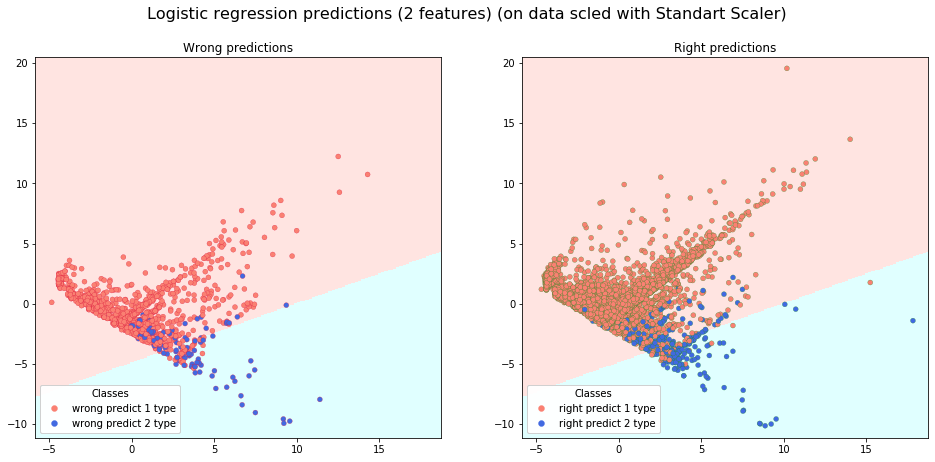

In [130]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
clf_for_plot = LogisticRegression(**grid_logreg_standart.best_params_)
clf_for_plot.fit(X_pca_scaled_standart_test[:,:2], y_pca_scaled_standart_test)

cmap_light = ListedColormap(['mistyrose', 'lightcyan'])
cmap_bold = ListedColormap(['salmon', 'royalblue'])

F_labels ={'wrong predict 1 type':0, 'wrong predict 2 type':1}
T_labels ={'right predict 1 type':0, 'right predict 2 type':1}
h = 0.1

x_min, x_max = X_pca_scaled_standart_test[:, 0].min() - 1, X_pca_scaled_standart_test[:, 0].max() + 1
y_min, y_max = X_pca_scaled_standart_test[:, 1].min() - 1, X_pca_scaled_standart_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(16, 7), ncols=2)
fig.suptitle('Logistic regression predictions (2 features) (on data scled with Standart Scaler)', fontsize = 16)


# Plot wrong points
ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[0].set_title('Wrong predictions')

# ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)

F_scatter = ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='crimson', s=25)
F_legend = ax[0].legend(handles = F_scatter.legend_elements()[0], labels=F_labels.keys(), loc="lower left", title="Classes")
ax[0].add_artist(F_legend)
# Plot true points
ax[1].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[1].set_title('Right predictions')
# ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)
T_scatter = ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='forestgreen', s=25)
T_legend = ax[1].legend(handles = T_scatter.legend_elements()[0], labels=T_labels.keys(), loc="lower left", title="Classes")
ax[1].add_artist(T_legend)
fig.show()

#### Построим Logistic regression на данных стандартизированных с помощью MinMax Scaler'a

In [84]:
logreg = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]}

grid_logreg_minMax = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'roc_auc')
grid_logreg_minMax.fit(X_pca_scaled_minMax_train, y_pca_scaled_minMax_train)

print(grid_logreg_minMax.best_score_)  

0.7055835177214711


In [85]:
print(grid_logreg_minMax.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [86]:
y_logreg_pca_scaled_minMax_pred = grid_logreg_minMax.best_estimator_.predict(X_pca_scaled_minMax_test)
y_logreg_pca_scaled_minMax_prob = grid_logreg_minMax.best_estimator_.predict_proba(X_pca_scaled_minMax_test)

In [87]:
print("Accuracy: ", accuracy_score(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))
print("Recall: ", recall_score(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))
print("Precision: ", precision_score(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))
print("F1: ", f1_score(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))
print(classification_report(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred)) 

Accuracy:  0.8116872149974667
Recall:  0.23551829268292682
Precision:  0.7339667458432304
F1:  0.35660703981534914
ROC AUC:  0.7020595970767691
Confusion matrix:
 [[4497  112]
 [1003  309]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4609
           1       0.73      0.24      0.36      1312

    accuracy                           0.81      5921
   macro avg       0.78      0.61      0.62      5921
weighted avg       0.80      0.81      0.77      5921



#### График правильно и неправильно предсказанных точек (с областью, построенной только по двум первым компонентам PCA)

In [131]:
pairs = list(zip(y_pca_scaled_minMax_test, y_logreg_pca_scaled_minMax_pred))

y_pred_wrong = []
X_wrong_0 = []
X_wrong_1 = []

y_pred_true = []
X_true_0 = []
X_true_1 = []

for i in range(len(y_pca_scaled_minMax_test)):
    if pairs[i][0] != pairs[i][1]:
        y_pred_wrong.append(pairs[i][1])
        X_wrong_0.append(X_pca_scaled_minMax_test[i, 0]) 
        X_wrong_1.append(X_pca_scaled_minMax_test[i, 1])
    else:
        y_pred_true.append(pairs[i][1])
        X_true_0.append(X_pca_scaled_minMax_test[i, 0]) 
        X_true_1.append(X_pca_scaled_minMax_test[i, 1])

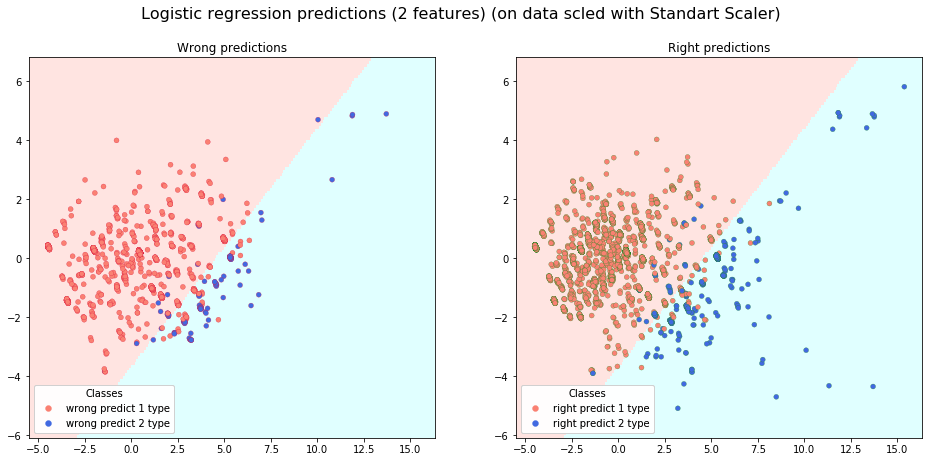

In [132]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
clf_for_plot = LogisticRegression(**grid_logreg_minMax.best_params_)
clf_for_plot.fit(X_pca_scaled_minMax_test[:,:2], y_pca_scaled_minMax_test)

cmap_light = ListedColormap(['mistyrose', 'lightcyan'])
cmap_bold = ListedColormap(['salmon', 'royalblue'])

F_labels ={'wrong predict 1 type':0, 'wrong predict 2 type':1}
T_labels ={'right predict 1 type':0, 'right predict 2 type':1}
h = 0.1

x_min, x_max = X_pca_scaled_minMax_test[:, 0].min() - 1, X_pca_scaled_minMax_test[:, 0].max() + 1
y_min, y_max = X_pca_scaled_minMax_test[:, 1].min() - 1, X_pca_scaled_minMax_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(16, 7), ncols=2)
fig.suptitle('Logistic regression predictions (2 features) (on data scled with Standart Scaler)', fontsize = 16)


# Plot wrong points
ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[0].set_title('Wrong predictions')

# ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)

F_scatter = ax[0].scatter(X_wrong_0, X_wrong_1, c=y_pred_wrong, cmap=cmap_bold, linewidths=0.25, edgecolor='crimson', s=25)
F_legend = ax[0].legend(handles = F_scatter.legend_elements()[0], labels=F_labels.keys(), loc="lower left", title="Classes")
ax[0].add_artist(F_legend)
# Plot true points
ax[1].pcolormesh(xx, yy, Z, cmap=cmap_light)
ax[1].set_title('Right predictions')
# ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='black',  s=25)
T_scatter = ax[1].scatter(X_true_0, X_true_1, c=y_pred_true, cmap=cmap_bold, linewidths=0.25, edgecolor='forestgreen', s=25)
T_legend = ax[1].legend(handles = T_scatter.legend_elements()[0], labels=T_labels.keys(), loc="lower left", title="Classes")
ax[1].add_artist(T_legend)
fig.show()

#### Построим Logistic regression на нестандартизированных данных

In [88]:
logreg = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]}

grid_logreg_not_scaled = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'roc_auc')
grid_logreg_not_scaled.fit(X_not_scaled_train, y_not_scaled_train)

print(grid_logreg_not_scaled.best_score_)  

0.7211385993666731


In [89]:
print(grid_logreg_not_scaled.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [90]:
y_logreg_not_scaled_pred = grid_logreg_not_scaled.best_estimator_.predict(X_not_scaled_test)
y_logreg_not_scaled_prob = grid_logreg_not_scaled.best_estimator_.predict_proba(X_not_scaled_test)

In [91]:
print("Accuracy: ", accuracy_score(y_not_scaled_test, y_logreg_not_scaled_pred))
print("Recall: ", recall_score(y_not_scaled_test, y_logreg_not_scaled_pred))
print("Precision: ", precision_score(y_not_scaled_test, y_logreg_not_scaled_pred))
print("F1: ", f1_score(y_not_scaled_test, y_logreg_not_scaled_pred))
print("ROC AUC: ", roc_auc_score(y_not_scaled_test, y_logreg_not_scaled_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_not_scaled_test, y_logreg_not_scaled_pred))
print(classification_report(y_not_scaled_test, y_logreg_not_scaled_pred)) 

Accuracy:  0.8064516129032258
Recall:  0.23330832708177043
Precision:  0.7149425287356321
F1:  0.35180995475113125
ROC AUC:  0.7328312025696049
Confusion matrix:
 [[4464  124]
 [1022  311]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4588
           1       0.71      0.23      0.35      1333

    accuracy                           0.81      5921
   macro avg       0.76      0.60      0.62      5921
weighted avg       0.79      0.81      0.77      5921



Как видно, модели Logistic regession в целом дают немного лучшие результаты, чем knn (и тренируются заметно быстрее чем knn). Также модели Logistoc Regression, построенных на данных, стандартизированных с помощью Standart Scaler, MinMax Scaler и даже нестандартизированных данных имеют примерно одинаковые результаты метрик.

### Наиболее значимые коэффициенты и признаки, к которым они относятся

#### Logistic Regression on data scaled with Standart Scaler

In [178]:
grid_logreg_standart.best_estimator_.coef_

array([[ 0.15641152, -0.32343987, -0.22204996,  0.11614791, -0.21453729,
         0.07173665,  0.12242021,  0.15606557,  0.02893532,  0.05660617,
        -0.07722001, -0.321854  , -0.07676491,  0.02135019]])

Наиболее значмые признаки - это те компоненты pca, которые дают:<br> 20% информации(состоит из исходных признаков X1, X7, X8, X9, X10, X12, X13, X14, X15, X16, X17)(с коэффициентом -0.32343987) <br> 2% информации(состоит из исходных признаков X6, X8, X11, X7, X10)(с коэффициентом -0.321854).


#### Logistic Regression on data scaled with MinMax Scaler

In [92]:
grid_logreg_minMax.best_estimator_.coef_

array([[ 0.29538779, -0.40039007, -0.32656896, -0.05965192,  0.10301634,
         0.08809906,  0.14107273]])

Наиболее значмые признаки - это те компоненты pca, которые дают:<br> 9% информации(состоит из исходных признаков X6, X11, X7, X10, X9)(с коэффициентом -0.40039007) <br> 6% информации(состоит из исходных признаков X6, X8, X11, X7, X10)(с коэффициентом -0.32656896).<br>
Видно, что исходные признаки совпадают с предыдущим выводом


#### Logistic Regression on not scaled data

In [179]:
coefs_columns = {}
for i in range(len(grid_logreg_not_scaled.best_estimator_.coef_[0])):
    coefs_columns[X_not_scaled.columns[i]] = abs(grid_logreg_not_scaled.best_estimator_.coef_[0][i])

sorted_coefs_columns = {k: v for k, v in sorted(coefs_columns.items(), key=lambda item: item[1], reverse=True)}

for key in sorted_coefs_columns:
    print(sorted_coefs_columns[key], key)

0.5681428316737764 X6
0.1909387192360847 single
0.1273059321398889 Female
0.0831873177591379 X7
0.06380123934045352 X8
0.05593003460917913 graduate school
0.054657943292661576 X10
0.020318781829060627 high school
0.01994286426135293 X9
0.0029470051472487778 X5
1.5707981769940725e-05 X18
1.026630207031511e-05 X19
5.78215927117105e-06 X12
5.1194217231258875e-06 X22
3.285225871215167e-06 X21
3.0189805480946762e-06 X13
2.6013420114246663e-06 X20
1.8078658372767235e-06 X16
1.6274074513654832e-06 X17
1.391577653403934e-06 X14
1.2232330254326916e-06 X23
5.83147811623544e-07 X1
5.789823209009102e-07 X15
0.0 X11
0.0 Male
0.0 university
0.0 others
0.0 married


Наиболее важные признаки - X6, single, Female, X7, X8. Можно заметить, что категориальные признаки из них (single, Female) - это категории, которые были самыми многочисленными.

### Decision Tree Classifier

In [93]:
from sklearn.tree  import DecisionTreeClassifier

Построим Decision Tree Classifier на данных стандартизирванных с помощью Standart Scaler'a

In [94]:
decision_param = {
    "criterion":['gini', 'entropy'],
    "max_depth" : range(1,10),
    "min_samples_split": range(1,20,2),
}
grid_dt_standart = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid = decision_param, cv=5, verbose=0, scoring='f1')
grid_dt_standart.fit(X_pca_scaled_standart_train, y_pca_scaled_standart_train)
y_dt_pca_scaled_standart_pred = grid_dt_standart.predict(X_pca_scaled_standart_test)
y_dt_pca_scaled_standart_prob = grid_dt_standart.predict_proba(X_pca_scaled_standart_test)

In [95]:
print (grid_dt_standart.best_score_)
print (grid_dt_standart.best_params_)
print (grid_dt_standart.best_estimator_)

0.4505640604703472
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5)


In [96]:
print("Accuracy: ", accuracy_score(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred))
print("Recall: ", recall_score(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred))
print("Precision: ", precision_score(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred))
print("F1: ", f1_score(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred))
print(classification_report(y_pca_scaled_standart_test, y_dt_pca_scaled_standart_pred)) 

Accuracy:  0.8093227495355514
Recall:  0.3521870286576169
Precision:  0.6336499321573948
F1:  0.4527387300048473
ROC AUC:  0.7390780686594551
Confusion matrix:
 [[4325  270]
 [ 859  467]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4595
           1       0.63      0.35      0.45      1326

    accuracy                           0.81      5921
   macro avg       0.73      0.65      0.67      5921
weighted avg       0.79      0.81      0.79      5921



Построим Decision Tree Classifier на данных стандартизирванных с помощью MinMax  Scaler'a

In [97]:
decision_param = {
    "criterion":['gini', 'entropy'],
    "max_depth" : range(1,10),
    "min_samples_split": range(1,20,2),
}
grid_dt_minMax = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid = decision_param, cv=5, verbose=0, scoring='f1')
grid_dt_minMax.fit(X_pca_scaled_minMax_train, y_pca_scaled_minMax_train)
y_dt_pca_scaled_minMax_pred = grid_dt_minMax.predict(X_pca_scaled_minMax_test)
y_dt_pca_scaled_minMax_prob = grid_dt_minMax.predict_proba(X_pca_scaled_minMax_test)

In [98]:
print (grid_dt_minMax.best_score_)
print (grid_dt_minMax.best_params_)
print (grid_dt_minMax.best_estimator_)

0.4880505774568541
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}
DecisionTreeClassifier(max_depth=3, min_samples_split=3)


In [99]:
print("Accuracy: ", accuracy_score(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred))
print("Recall: ", recall_score(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred))
print("Precision: ", precision_score(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred))
print("F1: ", f1_score(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred))
print("ROC AUC: ", roc_auc_score(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred))
print(classification_report(y_pca_scaled_minMax_test, y_dt_pca_scaled_minMax_pred)) 

Accuracy:  0.8078027360243202
Recall:  0.3254573170731707
Precision:  0.6279411764705882
F1:  0.42871485943775095
ROC AUC:  0.7256040507966915
Confusion matrix:
 [[4356  253]
 [ 885  427]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4609
           1       0.63      0.33      0.43      1312

    accuracy                           0.81      5921
   macro avg       0.73      0.64      0.66      5921
weighted avg       0.79      0.81      0.78      5921



Построим Decision Tree Classifier на нестандартизированных данных

In [100]:
decision_param = {
    "criterion":['gini', 'entropy'],
    "max_depth" : range(1,10),
    "min_samples_split": range(1,20,2),
}
grid_dt_not_scaled = GridSearchCV(estimator=DecisionTreeClassifier(), 
                                param_grid = decision_param, cv=5, verbose=0, scoring='f1')
grid_dt_not_scaled.fit(X_not_scaled_train, y_not_scaled_train)
y_dt_pca_not_scaled_pred = grid_dt_not_scaled.predict(X_not_scaled_test)
y_dt_pca_not_scaled_prob = grid_dt_not_scaled.predict_proba(X_not_scaled_test)

In [101]:
print (grid_dt_not_scaled.best_score_)
print (grid_dt_not_scaled.best_params_)
print (grid_dt_not_scaled.best_estimator_)

0.4672185850678254
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}
DecisionTreeClassifier(max_depth=3, min_samples_split=3)


In [102]:
print("Accuracy: ", accuracy_score(y_not_scaled_test, y_dt_pca_not_scaled_pred))
print("Recall: ", recall_score(y_not_scaled_test, y_dt_pca_not_scaled_pred))
print("Precision: ", precision_score(y_not_scaled_test, y_dt_pca_not_scaled_pred))
print("F1: ", f1_score(y_not_scaled_test, y_dt_pca_not_scaled_pred))
print("ROC AUC: ", roc_auc_score(y_not_scaled_test, y_dt_pca_not_scaled_prob[:,1]))
print("Confusion matrix:\n", confusion_matrix(y_not_scaled_test, y_dt_pca_not_scaled_pred))
print(classification_report(y_not_scaled_test, y_dt_pca_not_scaled_pred)) 

Accuracy:  0.8204695152845803
Recall:  0.377344336084021
Precision:  0.6834239130434783
F1:  0.4862252295795071
ROC AUC:  0.7267225208656132
Confusion matrix:
 [[4355  233]
 [ 830  503]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4588
           1       0.68      0.38      0.49      1333

    accuracy                           0.82      5921
   macro avg       0.76      0.66      0.69      5921
weighted avg       0.80      0.82      0.80      5921



Видно, что опять же, на все данных (стандартизированных с помощью Stanart Scaler, MinMax Scaler и нестандартизированных) получились примерно одинаковые результаты

#### График

In [103]:
n_nodes = grid_dt_minMax.best_estimator_.tree_.node_count
children_left = grid_dt_minMax.best_estimator_.tree_.children_left
children_right = grid_dt_minMax.best_estimator_.tree_.children_right
feature = grid_dt_minMax.best_estimator_.tree_.feature
threshold = grid_dt_minMax.best_estimator_.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 15 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.5815894305706024 else to node 8.
	node=1 test node: go to node 2 if X[:, 1] <= -0.9193167686462402 else to node 5.
		node=2 test node: go to node 3 if X[:, 1] <= -2.5251364707946777 else to node 4.
			node=3 leaf node.
			node=4 leaf node.
		node=5 test node: go to node 6 if X[:, 6] <= 0.9379098117351532 else to node 7.
			node=6 leaf node.
			node=7 leaf node.
	node=8 test node: go to node 9 if X[:, 0] <= 2.686377167701721 else to node 12.
		node=9 test node: go to node 10 if X[:, 1] <= -0.1152033768594265 else to node 11.
			node=10 leaf node.
			node=11 leaf node.
		node=12 test node: go to node 13 if X[:, 2] <= 0.03536016494035721 else to node 14.
			node=13 leaf node.
			node=14 leaf node.



In [104]:
from sklearn import tree

#### Tree for data scaled with MinMax Scaler

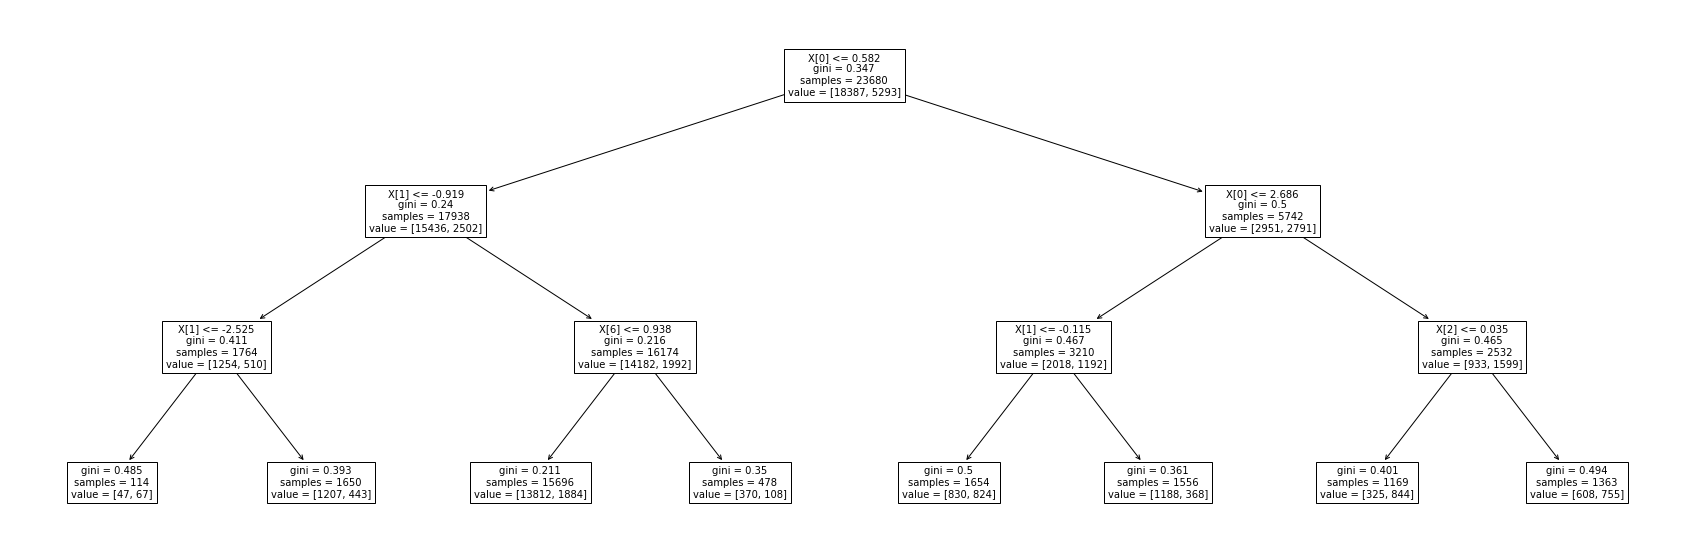

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 10))
tree.plot_tree(grid_dt_minMax.best_estimator_, fontsize=10);
plt.show()

Самые главные признаки - это корень дерева и его ближайшие потомки, то есть X[0] и X[1](первые две компоненты в pca). Также менее значимые - X[2], X[6].

#### Tree for data scaled with Standart Scaler

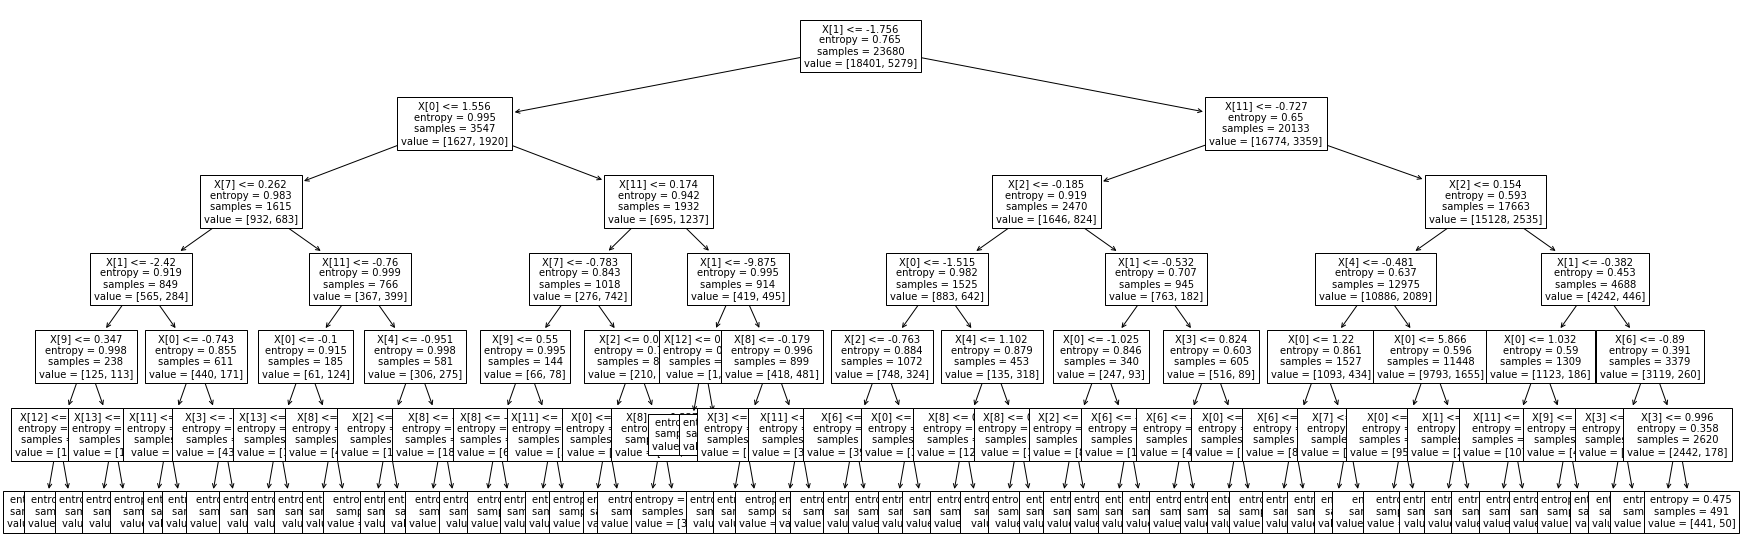

In [203]:
fig, ax = plt.subplots(figsize=(30, 10))
tree.plot_tree(grid_dt_standart.best_estimator_, fontsize=10);
plt.show()